## TASK 2 : MOVIE RATING PREDICTION 

In [79]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [80]:
df = pd.read_csv(r"C:\Users\bollapalli bharadwaj\OneDrive\Documents\lab\IMDb Movies India.csv", encoding='iso-8859-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [81]:
df.shape

(15509, 10)

## Data Cleaning

In [82]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [84]:
df.duplicated().sum()

6

In [85]:
df.dropna(inplace=True)

In [86]:
df.shape

(5659, 10)

In [87]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [88]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

## Data Pre-Processing

In [89]:
# Replacing the brackets from year column
df["Year"] =df["Year"].str.replace(r'[()]', '', regex=True).astype(int)

In [90]:
df["Duration"] = pd.to_numeric(df["Duration"].str.replace('min', '').str.strip())

In [91]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df["Genre"].fillna(df["Genre"].mode()[0], inplace=True)

In [92]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


## Data Visualizing

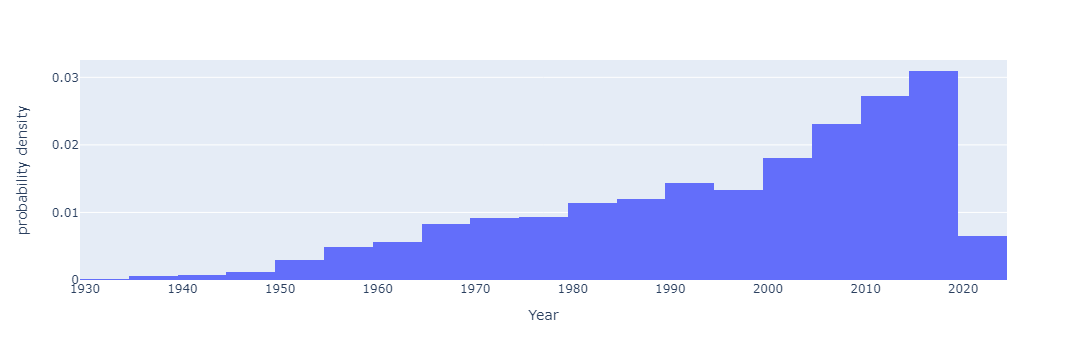

In [94]:
year = px.histogram(df,x='Year',histnorm='probability density',nbins=30)
year.show()

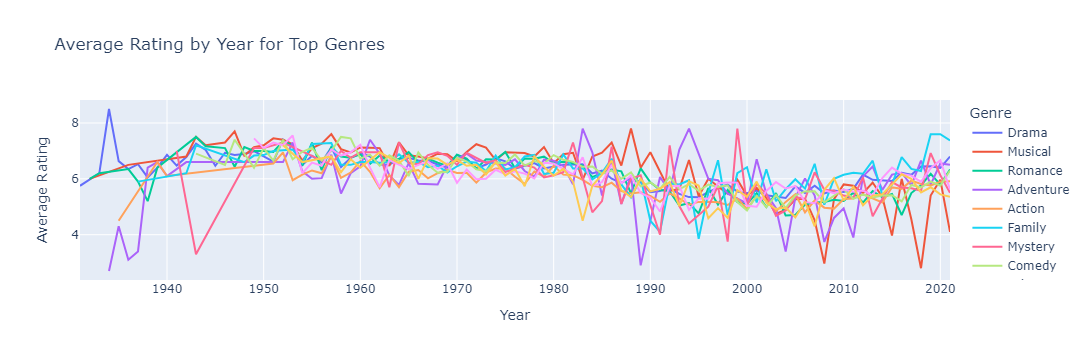

In [95]:
# Group data by Year and Genre, calculate average rating
avg_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 10 genres
top_genres = df['Genre'].value_counts().head(10).index

# Filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

fig = px.line(average_rating_by_year, x='Year', y='Rating', color='Genre',
              title="Average Rating by Year for Top Genres",
              labels={'Year': 'Year', 'Rating': 'Average Rating', 'Genre': 'Genre'})

# Updating the details into chart like title and axis labels
fig.update_layout(title="Average Rating by Year for Top Genres",xaxis_title='Year', yaxis_title="Average Rating")

# Show the plot
fig.show()

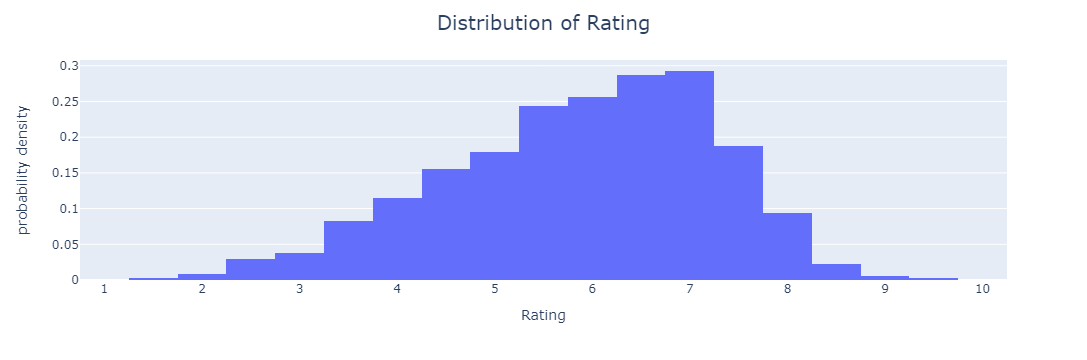

In [96]:
rating_fig=px.histogram(df,x='Rating',histnorm='probability density',nbins=40)
rating_fig.update_layout(title='Distribution of Rating',title_x=0.5,title_pad=dict(t=20),title_font=dict(size=20),xaxis_title='Rating',yaxis_title='probability density')
rating_fig.show()                         

## Feature Engineering

In [97]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [98]:
# Group by 'Genre' and calculate the mean rating, then create a new column for genre mean rating
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

# Group by 'Director' and calculate the mean rating, then create a new column for director mean rating
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

# Group by 'Actor 1' and calculate the mean rating, then create a new column for actor1 mean rating
actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

# Group by 'Actor 2' and calculate the mean rating, then create a new column for actor2 mean rating
actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

# Group by 'Actor 3' and calculate the mean rating, then create a new column for actor3 mean rating
actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating


In [99]:
x=df[['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded']]
y=df['Rating']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Building

In [101]:
#building machine learning model and training them
model = LinearRegression()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)

In [102]:
# Evaluate the performance of the model
print('The performance evaluation of Linear Regression is below:')
print("Mean squared error:", mean_squared_error(y_test, model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, model_pred))
print('R2 score:', r2_score(y_test, model_pred))

The performance evaluation of Linear Regression is below:
Mean squared error: 0.4465441653985704
Mean absolute error: 0.49219025407656397
R2 score: 0.7641133663863862


## Model Testing

In [103]:
x.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [104]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [105]:
# For testing we create a new dataframe with values close to the any of our existing data to evaluate
data={'Year':[2019],'Votes':[36],'Duration':[111],'Genre_mean_rating':[5.8],'Director_encoded':[4.5],'Actor1_encoded':[5.3],'Actor2_encoded':[4.5],'Actor3_encoded':[4.5]}
trail=pd.DataFrame(data)

In [106]:
# Predict the movie rating ny entered data
rating_predicted=model.predict(trail)

# Display the preddicted result from the Model
print("Predicted Rating:",rating_predicted[0])

Predicted Rating: 4.2074589621343295
